In [6]:
import os
import random
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
def set_seed(seed: int):
    random.seed(seed) # Python
    np.random.seed(seed)  # Numpy, é o gerador utilizado pelo sklearn
    os.environ["PYTHONHASHSEED"] = str(seed)  # sistema operativo


set_seed(25)

In [8]:
# Load datasets
radi = pd.read_csv("/Users/jony/Documents/GitHub/DAATP/sbsppdaa24/train_radiomics_hipocamp.csv")

In [39]:

# Filtrar colunas que começam com "wavelet-"
wavelet_columns = [col for col in radi.columns if col.startswith("lbp-")]
radi_wavelet_only = radi[wavelet_columns]

# Exibir ou salvar o resultado
print(radi_wavelet_only.columns.tolist())


['lbp-2D_firstorder_10Percentile', 'lbp-2D_firstorder_90Percentile', 'lbp-2D_firstorder_Energy', 'lbp-2D_firstorder_Entropy', 'lbp-2D_firstorder_InterquartileRange', 'lbp-2D_firstorder_Kurtosis', 'lbp-2D_firstorder_Maximum', 'lbp-2D_firstorder_MeanAbsoluteDeviation', 'lbp-2D_firstorder_Mean', 'lbp-2D_firstorder_Median', 'lbp-2D_firstorder_Minimum', 'lbp-2D_firstorder_Range', 'lbp-2D_firstorder_RobustMeanAbsoluteDeviation', 'lbp-2D_firstorder_RootMeanSquared', 'lbp-2D_firstorder_Skewness', 'lbp-2D_firstorder_TotalEnergy', 'lbp-2D_firstorder_Uniformity', 'lbp-2D_firstorder_Variance', 'lbp-2D_glcm_Autocorrelation', 'lbp-2D_glcm_ClusterProminence', 'lbp-2D_glcm_ClusterShade', 'lbp-2D_glcm_ClusterTendency', 'lbp-2D_glcm_Contrast', 'lbp-2D_glcm_Correlation', 'lbp-2D_glcm_DifferenceAverage', 'lbp-2D_glcm_DifferenceEntropy', 'lbp-2D_glcm_DifferenceVariance', 'lbp-2D_glcm_Id', 'lbp-2D_glcm_Idm', 'lbp-2D_glcm_Idmn', 'lbp-2D_glcm_Idn', 'lbp-2D_glcm_Imc1', 'lbp-2D_glcm_Imc2', 'lbp-2D_glcm_InverseV

In [40]:
from sklearn.preprocessing import StandardScaler

# Padronizar as colunas
scaler = StandardScaler()
scaled_data = scaler.fit_transform(radi_wavelet_only)


In [29]:
# Exemplo com colunas de wavelet- e a coluna alvo 'transition'
filtered_wavelet_data = pd.concat([radi_wavelet_only, radi['Transition']], axis=1)
print(filtered_wavelet_data.dtypes)


log-sigma-1-0-mm-3D_firstorder_10Percentile          float64
log-sigma-1-0-mm-3D_firstorder_90Percentile          float64
log-sigma-1-0-mm-3D_firstorder_Energy                float64
log-sigma-1-0-mm-3D_firstorder_Entropy               float64
log-sigma-1-0-mm-3D_firstorder_InterquartileRange    float64
                                                      ...   
log-sigma-5-0-mm-3D_ngtdm_Coarseness                 float64
log-sigma-5-0-mm-3D_ngtdm_Complexity                 float64
log-sigma-5-0-mm-3D_ngtdm_Contrast                   float64
log-sigma-5-0-mm-3D_ngtdm_Strength                   float64
Transition                                            object
Length: 466, dtype: object


In [41]:
from sklearn.preprocessing import LabelEncoder

# Codificar a coluna 'Transition'
radi['Transition'] = LabelEncoder().fit_transform(radi['Transition'])


In [42]:
filtered_wavelet_data = pd.concat([radi_wavelet_only, radi['Transition']], axis=1)
correlation_matrix = filtered_wavelet_data.corr()

# Correlação da variável 'Transition'
correlation_with_target = correlation_matrix['Transition'].sort_values(ascending=False)
print("Correlação com a variável alvo:")
print(correlation_with_target)


Correlação com a variável alvo:
Transition                                       1.000000
lbp-3D-k_glszm_LargeAreaLowGrayLevelEmphasis     0.145750
lbp-3D-k_glszm_LargeAreaEmphasis                 0.145591
lbp-3D-k_glszm_LargeAreaHighGrayLevelEmphasis    0.144878
lbp-3D-k_glszm_ZoneVariance                      0.144075
                                                   ...   
lbp-3D-m2_ngtdm_Busyness                              NaN
lbp-3D-m2_ngtdm_Coarseness                            NaN
lbp-3D-m2_ngtdm_Complexity                            NaN
lbp-3D-m2_ngtdm_Contrast                              NaN
lbp-3D-m2_ngtdm_Strength                              NaN
Name: Transition, Length: 373, dtype: float64


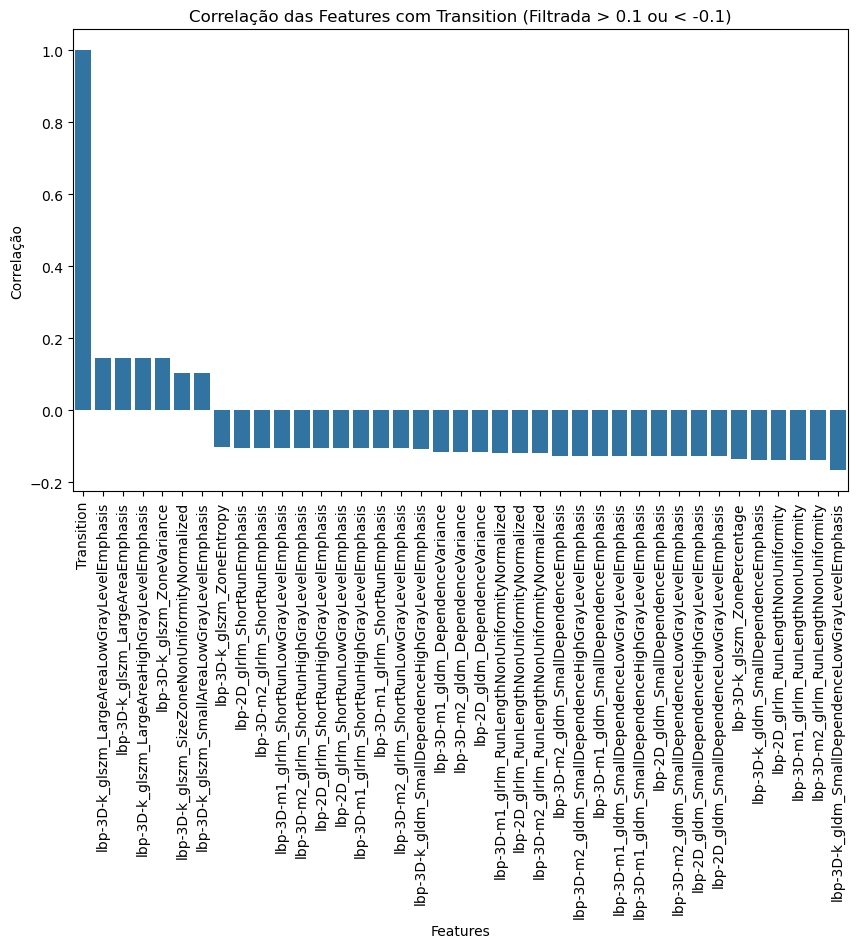

In [43]:
# Filtrando as correlações com valor absoluto maior que 0.1
correlation_with_target_filtered = correlation_with_target[correlation_with_target.abs() > 0.1]

# Visualizar as correlações filtradas
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target_filtered.index, y=correlation_with_target_filtered.values)
plt.xticks(rotation=90)
plt.title('Correlação das Features com Transition (Filtrada > 0.1 ou < -0.1)')
plt.xlabel('Features')
plt.ylabel('Correlação')
plt.show()



In [28]:
# Matriz de correlação, focando na relação com 'transition'
correlation_matrix = filtered_wavelet_data.corr()

# Correlação da variável 'transition' com as demais
correlation_with_target = correlation_matrix['Transition'].sort_values(ascending=False)
print("Correlação com a variável alvo:")
print(correlation_with_target)

# Plot da relação com o alvo
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xticks(rotation=90)
plt.title('Correlação das Features com Transition')
plt.xlabel('Features')
plt.ylabel('Correlação')
plt.show()


ValueError: could not convert string to float: 'CN-CN'

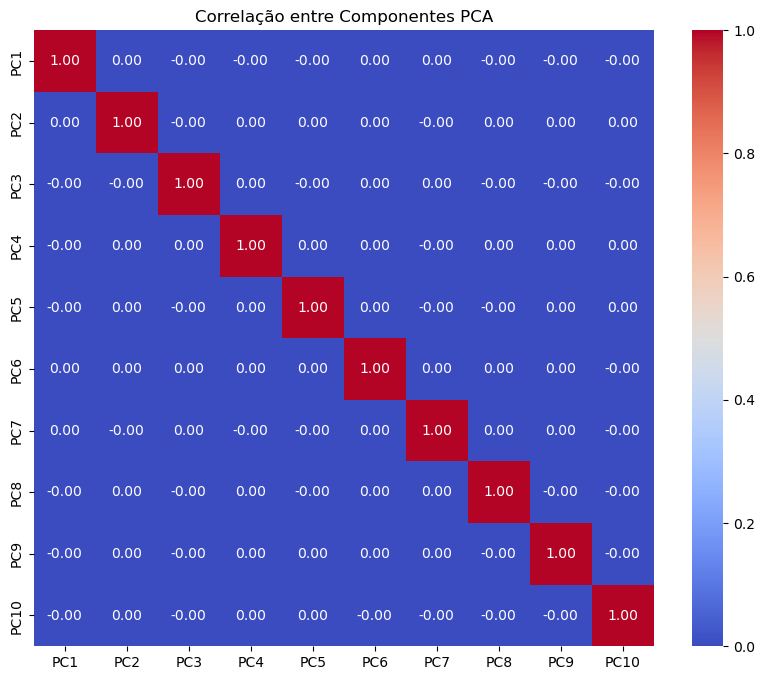

In [22]:
# Criar um DataFrame com os componentes principais
import pandas as pd
pca_components = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# Calcular a matriz de correlação
pca_corr = pca_components.corr()

# Visualizar a matriz de correlação
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(pca_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre Componentes PCA")
plt.show()


In [15]:
print(radi_wavelet_only.isnull().sum())
print(radi_wavelet_only.describe().loc[['min', 'max']])  # Valores extremos


wavelet-LLH_firstorder_10Percentile          0
wavelet-LLH_firstorder_90Percentile          0
wavelet-LLH_firstorder_Energy                0
wavelet-LLH_firstorder_Entropy               0
wavelet-LLH_firstorder_InterquartileRange    0
                                            ..
wavelet-LLL_ngtdm_Busyness                   0
wavelet-LLL_ngtdm_Coarseness                 0
wavelet-LLL_ngtdm_Complexity                 0
wavelet-LLL_ngtdm_Contrast                   0
wavelet-LLL_ngtdm_Strength                   0
Length: 744, dtype: int64
     wavelet-LLH_firstorder_10Percentile  wavelet-LLH_firstorder_90Percentile  \
min                           -16.432783                             6.075977   
max                            -7.402932                            12.447595   

     wavelet-LLH_firstorder_Energy  wavelet-LLH_firstorder_Entropy  \
min                  243674.605848                        1.001948   
max                  963328.880063                        1.279873   

  

In [17]:
# Filtrar colunas que começam com "log-"
log_columns = [col for col in radi.columns if col.startswith("log-")]
radi_log_only = radi[log_columns]

# Exibir ou salvar o resultado
print(radi_log_only.columns.tolist())

['log-sigma-1-0-mm-3D_firstorder_10Percentile', 'log-sigma-1-0-mm-3D_firstorder_90Percentile', 'log-sigma-1-0-mm-3D_firstorder_Energy', 'log-sigma-1-0-mm-3D_firstorder_Entropy', 'log-sigma-1-0-mm-3D_firstorder_InterquartileRange', 'log-sigma-1-0-mm-3D_firstorder_Kurtosis', 'log-sigma-1-0-mm-3D_firstorder_Maximum', 'log-sigma-1-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-1-0-mm-3D_firstorder_Mean', 'log-sigma-1-0-mm-3D_firstorder_Median', 'log-sigma-1-0-mm-3D_firstorder_Minimum', 'log-sigma-1-0-mm-3D_firstorder_Range', 'log-sigma-1-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-1-0-mm-3D_firstorder_RootMeanSquared', 'log-sigma-1-0-mm-3D_firstorder_Skewness', 'log-sigma-1-0-mm-3D_firstorder_TotalEnergy', 'log-sigma-1-0-mm-3D_firstorder_Uniformity', 'log-sigma-1-0-mm-3D_firstorder_Variance', 'log-sigma-1-0-mm-3D_glcm_Autocorrelation', 'log-sigma-1-0-mm-3D_glcm_ClusterProminence', 'log-sigma-1-0-mm-3D_glcm_ClusterShade', 'log-sigma-1-0-mm-3D_glcm_ClusterTendency', 'l

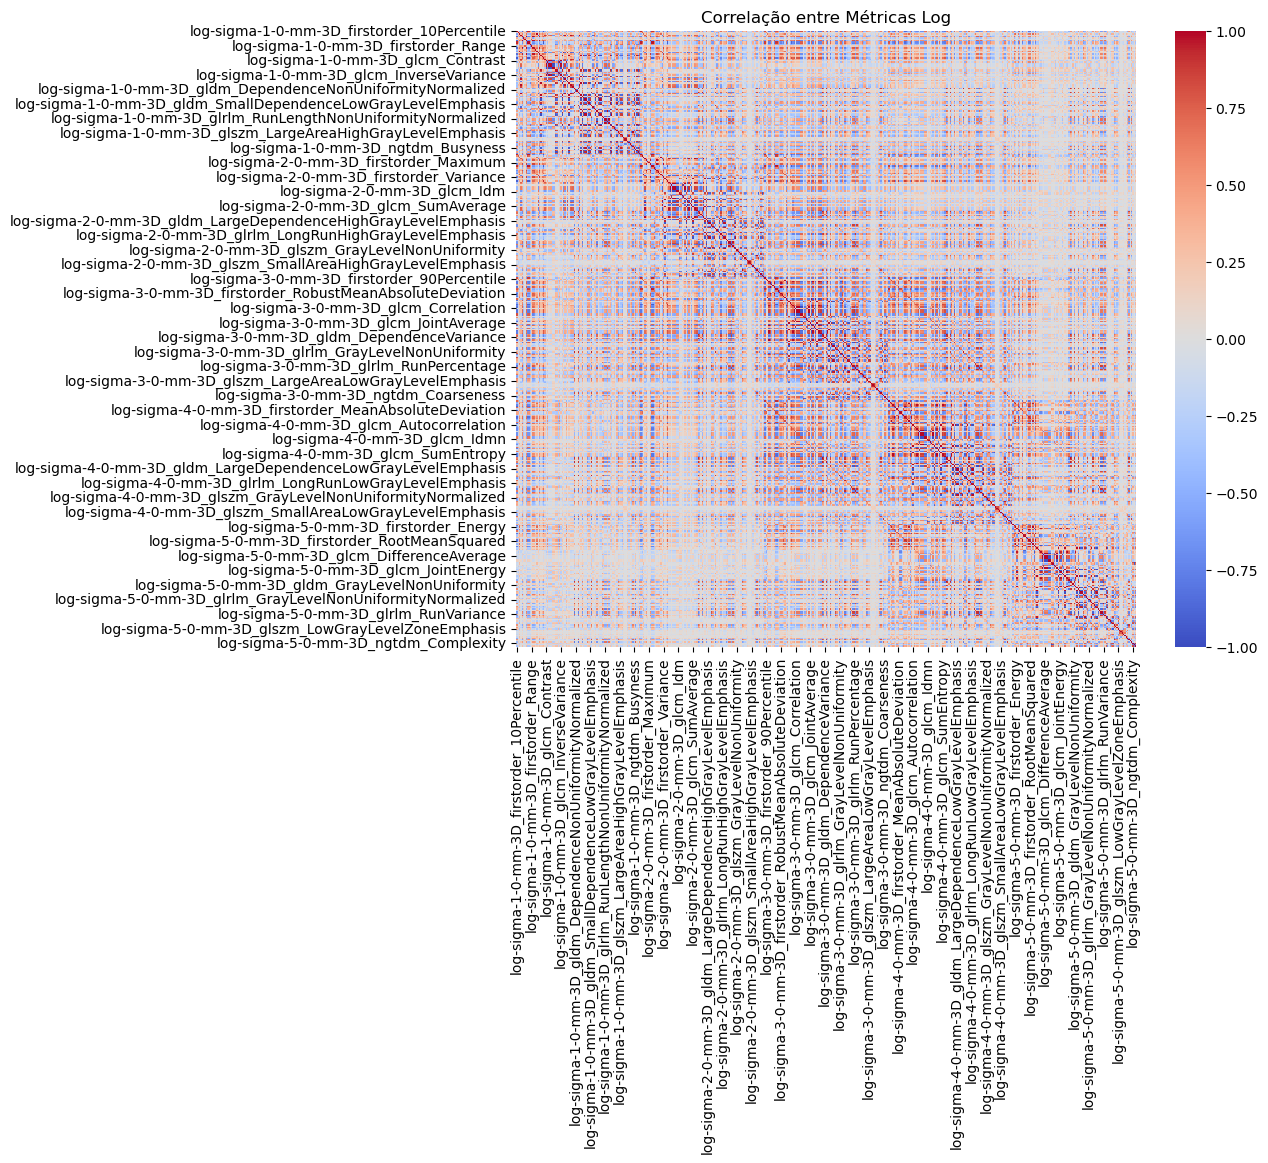

In [18]:
correlation_matrix = radi_log_only.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlação entre Métricas Log")
plt.show()